# Factor Analysis/PCA

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

import statsmodels.api as sm

import factor_analyzer

from sklearn import cluster
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

In [3]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

## Psycographic Data

In [ ]:
#Reading data
data_psy = pd.read_excel('../data/Ford_Ka_Data.xlsx', sheet_name='Psychographic Data') 
data_dem = pd.read_excel('../data/Ford_Ka_Data.xlsx', sheet_name='Demographic Data')
data_att = pd.read_excel('../data/Ford_Ka_Data.xlsx', sheet_name='Psychographic questionnaire')


In [4]:
data_psy.head(5)

,Respondent Number,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62
0,1,6,2,4,3,1,5,5,3,4,4,4,5,4,7,6,7,6,5,5,6,7,5,2,1,2,3,1,1,2,2,4,4,5,4,3,4,4,3,5,3,5,5,4,3,4,4,4,5,4,4,5,4,2,4,5,4,5,3,4,4,4,2
1,2,7,7,7,5,4,4,5,4,5,5,4,4,4,2,3,4,4,3,4,2,4,4,7,1,4,3,4,5,7,4,1,5,5,5,3,3,4,7,4,3,7,6,4,7,6,6,7,6,6,7,1,1,1,1,1,1,5,4,3,5,4,5
2,3,5,4,6,5,7,5,3,5,4,5,5,5,6,3,3,4,2,4,3,4,2,3,3,4,2,4,5,3,3,4,7,5,7,5,7,6,5,7,3,2,1,1,1,1,4,3,4,4,3,2,4,4,3,5,6,3,4,4,5,3,4,4
3,4,4,2,5,4,2,4,5,4,3,4,4,4,6,5,6,7,6,5,5,5,6,6,1,1,1,2,2,2,3,1,2,5,4,5,4,4,3,3,6,2,4,5,4,2,4,5,4,3,3,4,5,2,3,5,4,4,4,2,5,5,5,3
4,5,5,5,7,6,7,3,4,5,4,2,5,4,4,5,4,3,2,5,4,5,5,5,3,4,5,2,2,3,1,4,6,7,7,7,5,7,7,7,2,1,3,2,2,3,4,5,5,2,5,3,4,4,6,4,5,5,4,5,4,3,4,5


### Data Preperation

In [5]:
data_att.head(5)

,Question #,Statement,Attitude
0,1,I want a car that is trendy.,Fashion
1,2,I am fashion conscious.,Fashion
2,3,I do not have the time to worry about car main...,No-frills
3,4,Basic transportation is all I need.,No-frills
4,5,Small cars are not prestigious.,Emotion


In [6]:
data_att['Question #'] = 'q' + data_att['Question #'].astype(str)
data_att.head()

,Question #,Statement,Attitude
0,q1,I want a car that is trendy.,Fashion
1,q2,I am fashion conscious.,Fashion
2,q3,I do not have the time to worry about car main...,No-frills
3,q4,Basic transportation is all I need.,No-frills
4,q5,Small cars are not prestigious.,Emotion


In [7]:
data_psy = data_psy.drop(['Respondent Number'], axis=1)

In [8]:
ford_X = data_psy
ford_Y = data_dem[['Preference Group']]

### PCA - No Rotation

In [9]:
ford_X.shape

(250, 62)

In [10]:
ford_pca = factor_analyzer.FactorAnalyzer(n_factors=ford_X.shape[1],
                                          rotation=None,
                                          method='principal').fit(ford_X)

#### Loadings

In [11]:
def get_loadings_communalities(pca,round_dig=2,index_names=None):
    '''Returns a DataFrame containings the loadings'''
    df = pd.DataFrame(
      pca.loadings_,
      index=index_names if index_names else [f'q{i}' for i in range(1,1+pca.loadings_.shape[0])],
      columns=[f'RC{i}' for i in range(1,1+pca.loadings_.shape[1])] if pca.rotation else [f'PC{i}' for i in range(1,1+pca.loadings_.shape[1])]
      )
    if pca.rotation:
        df['communalities']=pca.get_communalities()
        df=df.round(3)
    return  df

get_loadings_communalities(ford_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
q1,-0.545326,-0.216734,0.569049,0.096414,-0.004688,0.016049,0.020131,-0.062720,0.077309,0.029261,-0.006123,-0.027485,-0.046452,-0.064446,-0.058722,0.059079,-0.028641,-0.003713,0.073225,-0.019416,0.025923,0.072976,0.074975,0.221297,0.032530,-0.059479,-0.048861,-0.104540,-0.078566,0.128934,0.108654,0.086899,-0.170812,-0.055750,0.203482,-0.016042,0.071401,0.066612,-0.061376,-0.118415,-0.009313,-0.127987,-0.072048,-0.032223,0.032804,0.038973,-0.067086,0.028736,0.000175,0.082811,-0.018972,-0.038966,0.077935,0.088904,0.087401,-0.070850,0.003633,-0.036009,0.018718,-0.028459,0.003986,0.007878
q2,-0.853469,0.151402,0.287859,-0.016543,0.022803,0.045834,0.007930,-0.000798,0.054599,0.012971,0.056415,0.012033,0.007570,-0.017934,0.024291,-0.001703,-0.032292,0.014662,-0.094788,-0.016880,0.007268,0.046309,0.010150,0.029887,0.017672,-0.021049,-0.009231,-0.052958,-0.036005,-0.027789,-0.021882,-0.052600,-0.072407,0.048411,-0.000783,-0.040408,-0.005974,0.006773,0.013840,0.006821,0.011400,0.030373,0.002590,0.033393,0.005405,0.107780,-0.074374,-0.025290,0.008933,-0.040843,0.163612,0.055340,-0.050852,0.024622,0.011983,-0.056545,-0.099394,0.209468,0.051289,0.074231,-0.055528,-0.009782
q3,0.175000,0.660076,-0.174135,0.010599,0.085977,-0.004204,0.068156,0.039494,-0.034260,-0.131119,0.031245,-0.007689,-0.085261,0.042077,0.074242,0.101147,0.023908,0.085943,-0.090076,0.489331,0.087433,0.100191,-0.052759,0.178895,0.012968,-0.145031,-0.041218,0.145400,-0.085072,0.150928,0.016315,-0.058995,0.111564,-0.026492,-0.042809,-0.047805,0.058208,0.022160,-0.050141,0.025597,-0.029121,-0.016442,0.052336,-0.089233,-0.055440,0.032244,-0.085277,0.051913,0.044692,-0.005187,0.009178,0.023126,0.046727,-0.021778,-0.031268,0.034531,-0.031235,-0.005028,-0.014564,0.018548,0.020133,0.001106
q4,-0.060964,0.617106,-0.569060,-0.088029,-0.039218,0.009315,0.104291,0.018333,0.027022,-0.023700,0.042427,-0.042664,-0.045983,0.032607,0.064720,0.005645,-0.009287,0.057251,0.063425,-0.050661,0.021016,-0.006779,0.056790,0.057659,0.020928,-0.012893,-0.030191,0.048255,0.088702,-0.079801,-0.022828,-0.056646,0.014430,-0.155316,-0.025603,-0.014836,0.112024,0.332726,-0.089021,-0.025903,0.068101,0.013558,-0.049272,0.051636,-0.012206,-0.101381,0.132565,-0.014757,0.034137,-0.043614,-0.033737,0.001823,0.063192,0.048148,-0.004016,-0.036349,0.071460,0.073265,0.028179,0.037467,-0.013684,0.005197
q5,-0.173990,0.798964,0.261429,0.033132,-0.017230,0.035073,0.041762,-0.008059,0.003565,-0.029263,0.041045,-0.027723,0.018347,-0.015793,0.013842,-0.024233,-0.144875,0.044756,0.074605,-0.037002,-0.096500,-0.054633,-0.043977,-0.059827,-0.005962,-0.092364,0.094632,-0.053931,-0.009250,-0.001297,-0.000114,-0.003926,0.004663,0.071008,0.009915,-0.094036,-0.036261,0.110037,0.066049,-0.047651,-0.176444,0.154213,-0.036561,-0.169457,-0.074390,-0.004415,0.072081,-0.028974,0.018608,0.071478,0.129505,-0.011319,-0.035547,0.043716,0.116780,0.107193,0.040424,-0.017936,-0.011146,-0.001916,0.046314,-0.012045
q6,0.022838,-0.016274,0.111769,-0.178483,0.854643,-0.111056,0.047164,0.054549,0.172983,0.023957,0.088765,0.021905,-0.015302,0.181138,-0.141643,-0.110814,-0.036508,0.014106,0.011625,0.003984,-0.060258,-0.020353,0.106784,-0.083171,0.089839,0.031001,0.089089,-0.111953,-0.003116,0.073312,-0.043610,0.038250,0.086546,0.035097,0.050659,-0.033364,-0.003985,0.101304,0.005444,0.031430,0.031389,-0.009227,-0.033485,0.023412,-0.015035,0.083184,-0.019531,-0.006600,-0.018151,-0.062032,-0.021646,-0.008124,0.015246,-0.018684,-0.013430,0.002473,-0.004596,-0.017425,-0.001125,-0.008964,0.021639,0.003222
q7,-0.107171,-0.027484,-0.148521,0.472697,-0.005898,0.304941,-0.483620,0.099117,-0.010712,-0.485647,0.028401,0.148843,-0.078396,-0.002247,-0.043231,-0.20

#### Explained Variance

In [12]:
def get_summary(pca,round_dig=2):
  ''' Print a summary of the PCA fit '''
  return pd.DataFrame(
      [pca.get_factor_variance()[0],
       pca.get_factor_variance()[1],
       pca.get_factor_variance()[2]],
       columns=['PC{}'.format(i) for i in
                range(1,1+len(pca.get_factor_variance()[0]))],
      index=['Sum of Squares Loadings','Proportion of Variance Explained',
             'Cumulative Proportion']
            ).round(round_dig)

get_summary(ford_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
Sum of Squares Loadings,16.60,10.78,5.79,1.47,1.28,1.21,1.17,1.12,1.01,0.98,0.90,0.85,0.82,0.79,0.76,0.74,0.72,0.70,0.64,0.64,0.61,0.60,0.58,0.55,0.54,0.52,0.50,0.49,0.46,0.46,0.42,0.41,0.40,0.39,0.38,0.36,0.34,0.33,0.32,0.32,0.30,0.29,0.28,0.26,0.26,0.23,0.23,0.22,0.21,0.20,0.19,0.18,0.16,0.15,0.15,0.14,0.12,0.12,0.11,0.09,0.08,0.08
Proportion of Variance Explained,0.27,0.17,0.09,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cumulative Proportion,0.27,0.44,0.54,0.56,0.58,0.60,0.62,0.64,0.65,0.67,0.68,0.70,0.71,0.72,0.73,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.84,0.85,0.86,0.87,0.88,0.88,0.89,0.90,0.90,0.91,0.91,0.92,0.92,0.93,0.93,0.94,0.94,0.95,0.95,0.96,0.96,0.96,0.97,0.97,0.97,0.98,0.98,0.98,0.99,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00


##### The cumulative proportion reaches 80% mark on 21st principal component. The sum of square loadingd per principal component goes under 1 after the 9th. However we can see that the proportion of variance explained is minimal after 3rd principal component.

Text(0, 0.5, 'Variance')

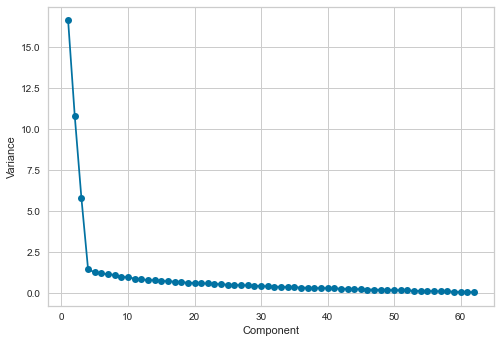

In [13]:
import matplotlib.pyplot as plt
plt.plot(1+np.arange(len(ford_pca.get_factor_variance()[0])),
         ford_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')

#### The variance is almost stable after the 4th component, therefore we will check both with 4 and 3 components.

### PCA - Varimax Rotation

In [14]:
ford_pca_rotated = factor_analyzer.FactorAnalyzer(n_factors=4,
                                          rotation='varimax',
                                          method='principal').fit(ford_X)

In [15]:
factor4 = get_loadings_communalities(ford_pca_rotated)
factor4

,RC1,RC2,RC3,RC4,communalities
q1,0.645,-0.324,0.395,0.023,0.677
q2,0.911,0.025,0.043,-0.051,0.834
q3,-0.121,0.686,-0.094,0.054,0.497
q4,-0.011,0.645,-0.548,-0.008,0.716
q5,0.348,0.750,0.232,0.032,0.738
q6,-0.000,-0.013,0.096,-0.189,0.045
q7,0.075,-0.051,-0.128,0.483,0.258
q8,-0.102,0.133,-0.041,-0.032,0.031
q9,0.085,-0.069,-0.082,-0.185,0.053
q10,0.106,-0.066,-0.024,0.582,0.355


#### The 4th component explains the questions in a very minimal amount (with a few exceptions), therefore we will move on with 3 components.

In [16]:
ford_pca_rotated = factor_analyzer.FactorAnalyzer(n_factors=3,
                                          rotation='varimax',
                                          method='principal').fit(ford_X)

#### Loadings & Communalities

In [17]:
factor3 = get_loadings_communalities(ford_pca_rotated)

factor3 = factor3.reset_index().rename(columns = {'index': 'Question #'})



In [18]:
factor3

,Question #,RC1,RC2,RC3,communalities
0,q1,0.630,-0.322,0.409,0.668
1,q2,0.910,0.023,0.075,0.834
2,q3,-0.119,0.687,-0.101,0.497
3,q4,0.008,0.643,-0.544,0.708
4,q5,0.340,0.751,0.240,0.737
5,q6,0.002,-0.021,0.113,0.013
6,q7,0.064,-0.030,-0.171,0.034
7,q8,-0.099,0.132,-0.040,0.029
8,q9,0.093,-0.078,-0.062,0.019
9,q10,0.089,-0.041,-0.076,0.015


In [19]:
factor3 = factor3.merge(data_att[['Question #','Statement']], how = 'left', on = 'Question #')

#### We filter the table to see questions that have communalities higher than 0.6.

In [20]:
factor3_filtered = factor3.loc[factor3['communalities']>0.6]
factor3_filtered

,Question #,RC1,RC2,RC3,communalities,Statement
0,q1,0.630,-0.322,0.409,0.668,I want a car that is trendy.
1,q2,0.910,0.023,0.075,0.834,I am fashion conscious.
3,q4,0.008,0.643,-0.544,0.708,Basic transportation is all I need.
4,q5,0.340,0.751,0.240,0.737,Small cars are not prestigious.
13,q14,-0.893,-0.136,0.249,0.877,The car I buy must be able to handle long moto...
14,q15,-0.630,-0.410,0.250,0.627,I want the most equipment I can get for my money.
16,q17,-0.372,-0.805,0.182,0.820,I want a car that is nippy and zippy.
19,q20,-0.889,-0.043,-0.086,0.799,One should not spend beyond ones means.
20,q21,-0.642,-0.381,0.260,0.625,Good aerodynamics help fuel economy.
22,q23,0.897,0.044,0.126,0.822,Buying a car on a lower interest rate does not...


In [21]:
factor3_filtered.loc[factor3_filtered['RC1']> 0.5]

,Question #,RC1,RC2,RC3,communalities,Statement
0,q1,0.630,-0.322,0.409,0.668,I want a car that is trendy.
1,q2,0.910,0.023,0.075,0.834,I am fashion conscious.
22,q23,0.897,0.044,0.126,0.822,Buying a car on a lower interest rate does not...
24,q25,0.558,0.526,-0.248,0.651,I consider myself an authority on cars.
27,q28,0.587,0.477,-0.197,0.611,Domestic made is best made.
40,q41,0.652,-0.488,-0.458,0.873,In today's world it is anti-social to drive bi...
43,q44,0.653,-0.629,-0.004,0.822,I want to buy a car that makes a statement abo...
44,q45,0.743,-0.261,-0.108,0.632,A car is an extension of oneself.
45,q46,0.765,-0.304,-0.017,0.678,I always want the latest style and design in a...
46,q47,0.768,-0.131,-0.162,0.633,When it comes to cars my heart rules my head.


#### We interpret RC1 to represent passion towards cars.

In [22]:
factor3_filtered.loc[factor3_filtered['RC2']>0.5]

,Question #,RC1,RC2,RC3,communalities,Statement
3,q4,0.008,0.643,-0.544,0.708,Basic transportation is all I need.
4,q5,0.340,0.751,0.240,0.737,Small cars are not prestigious.
23,q24,-0.328,0.618,0.466,0.708,I want a car that drives well on country roads.
24,q25,0.558,0.526,-0.248,0.651,I consider myself an authority on cars.
30,q31,-0.616,0.510,0.479,0.870,I want a comfortable car.
36,q37,-0.230,0.504,0.571,0.633,I prefer cars with high performance.


#### We interpret RC2 to represent focus on functionality.

In [23]:
factor3_filtered.loc[factor3_filtered['RC3']>0.5]

,Question #,RC1,RC2,RC3,communalities,Statement
36,q37,-0.230,0.504,0.571,0.633,I prefer cars with high performance.
51,q52,-0.724,0.079,0.515,0.796,I have a relationship with my car.
52,q53,-0.722,0.063,0.506,0.781,Quality and reliability of products are my mai...


#### We interpret RC2 to represent focus on high performance.


#### Scores

In [24]:
ford_Y.loc[ford_Y['Preference Group']==1,'Preference_Group_Name'] = 'Ka Chooser'
ford_Y.loc[ford_Y['Preference Group']==2,'Preference_Group_Name'] = 'Ka Non-Chooser'
ford_Y.loc[ford_Y['Preference Group']==3,'Preference_Group_Name'] = 'Middle'

/Users/akarberkin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/akarberkin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/akarberkin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [25]:
ford_X_scores = ford_pca_rotated.transform(ford_X)
ford_scores = pd.DataFrame(ford_X_scores,columns=['RC1','RC2','RC3'])
ford_Scores_XY = pd.concat([ford_scores, ford_Y],axis = 1)
ford_Scores_XY

,RC1,RC2,RC3,Preference Group,Preference_Group_Name
0,-1.002237,-1.042724,-0.706512,1,Ka Chooser
1,1.562683,-0.003871,-0.528081,3,Middle
2,-0.264483,1.857548,0.225793,2,Ka Non-Chooser
3,-1.093728,-0.691215,-1.278540,3,Middle
4,-0.526620,1.718462,-0.033414,1,Ka Chooser
...,...,...,...,...,...
245,1.446551,-0.652796,-0.330107,1,Ka Chooser
246,-0.083063,1.641470,-0.109563,1,Ka Chooser
247,-0.352605,-0.540931,2.011422,1,Ka Chooser
248,-0.412228,1.658564,-0.329758,2,Ka Non-Chooser


In [26]:
ford_XY_RC1 = ford_Scores_XY[['Preference_Group_Name','RC1']]

ford_XY_RC1.loc[ford_XY_RC1['RC1']>0,'Score_Range'] = 'Greater than 0' 
ford_XY_RC1.loc[ford_XY_RC1['RC1']<=0,'Score_Range'] = 'Less than 0'

ford_XY_RC1.loc[ford_XY_RC1['Preference_Group_Name']!='Middle'].groupby(['Preference_Group_Name','Score_Range']).count()

/Users/akarberkin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/akarberkin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/akarberkin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

RC1
Preference_Group_Name Score_Range        
Ka Chooser            Greater than 0   37
                      Less than 0      79
Ka Non-Chooser        Greater than 0   18
                      Less than 0      54

In [27]:
ford_XY_RC2 = ford_Scores_XY[['Preference_Group_Name','RC2']]

ford_XY_RC2.loc[ford_XY_RC2['RC2']>0,'Score_Range'] = 'Greater than 0' 
ford_XY_RC2.loc[ford_XY_RC2['RC2']<=0,'Score_Range'] = 'Less than 0'

ford_XY_RC2.loc[ford_XY_RC2['Preference_Group_Name']!='Middle'].groupby(['Preference_Group_Name','Score_Range']).count()

/Users/akarberkin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/akarberkin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/akarberkin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

RC2
Preference_Group_Name Score_Range        
Ka Chooser            Greater than 0   29
                      Less than 0      87
Ka Non-Chooser        Greater than 0   32
                      Less than 0      40

In [28]:
ford_XY_RC3 = ford_Scores_XY[['Preference_Group_Name','RC3']]

ford_XY_RC3.loc[ford_XY_RC3['RC3']>0,'Score_Range'] = 'Greater than 0' 
ford_XY_RC3.loc[ford_XY_RC3['RC3']<=0,'Score_Range'] = 'Less than 0'

ford_XY_RC3.loc[ford_XY_RC3['Preference_Group_Name']!='Middle'].groupby(['Preference_Group_Name','Score_Range']).count()

/Users/akarberkin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/akarberkin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/akarberkin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

RC3
Preference_Group_Name Score_Range        
Ka Chooser            Greater than 0   38
                      Less than 0      78
Ka Non-Chooser        Greater than 0   19
                      Less than 0      53

In [29]:
ford_Scores_XY

,RC1,RC2,RC3,Preference Group,Preference_Group_Name
0,-1.002237,-1.042724,-0.706512,1,Ka Chooser
1,1.562683,-0.003871,-0.528081,3,Middle
2,-0.264483,1.857548,0.225793,2,Ka Non-Chooser
3,-1.093728,-0.691215,-1.278540,3,Middle
4,-0.526620,1.718462,-0.033414,1,Ka Chooser
...,...,...,...,...,...
245,1.446551,-0.652796,-0.330107,1,Ka Chooser
246,-0.083063,1.641470,-0.109563,1,Ka Chooser
247,-0.352605,-0.540931,2.011422,1,Ka Chooser
248,-0.412228,1.658564,-0.329758,2,Ka Non-Chooser


### Cluster Analysis - K-Means

In [30]:
def check_clusters(data,labels):
  print(list(zip(*np.unique(labels,return_counts=True))))

  return pd.pivot_table(data,index=labels)

### Cluster Analysis - Scores

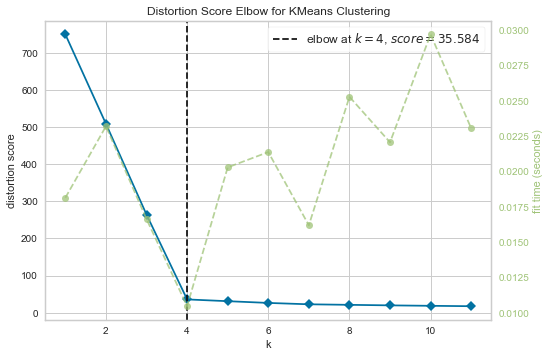

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(ford_scores)
visualizer.show()

##### Choosing the number of Clusters

In [49]:
centroids5, labels5, inertia5 = cluster.k_means(pd.DataFrame(ford_scores),n_clusters=5,random_state=1690)
check_clusters(ford_scores,labels5)

[(0, 65), (1, 36), (2, 78), (3, 32), (4, 39)]


,RC1,RC2,RC3
0,-0.200742,1.643329,-0.056442
1,-1.023489,-0.825612,-0.475503
2,1.383266,-0.430916,-0.245159
3,-0.464984,-0.533837,2.405634
4,-1.105679,-0.676928,-0.950541


In [48]:
centroids4, labels4, inertia4 = cluster.k_means(pd.DataFrame(ford_scores),n_clusters=4,random_state=1690)
check_clusters(ford_scores,labels4)

[(0, 65), (1, 75), (2, 78), (3, 32)]


,RC1,RC2,RC3
0,-0.200742,1.643329,-0.056442
1,-1.066228,-0.748296,-0.722522
2,1.383266,-0.430916,-0.245159
3,-0.464984,-0.533837,2.405634


In [42]:
centroids3, labels3, inertia3 = cluster.k_means(pd.DataFrame(ford_scores),n_clusters=3,random_state=1690)
check_clusters(ford_scores,labels3)

[(0, 65), (1, 107), (2, 78)]


,RC1,RC2,RC3
0,-0.200742,1.643329,-0.056442
1,-0.886416,-0.684159,0.213001
2,1.383266,-0.430916,-0.245159


In [50]:
centroids2, labels2, inertia2 = cluster.k_means(pd.DataFrame(ford_scores),n_clusters=2,random_state=1690)
check_clusters(ford_scores,labels)

[(0, 143), (1, 107)]


,RC1,RC2,RC3
0,0.663263,0.511923,-0.159378
1,-0.886416,-0.684159,0.213001


In [76]:
data_dem['Respondent Number'] = labels4.tolist()
data_choosers = data_dem.loc[data_dem['Preference Group']== 1]
data_non_choosers = data_dem.loc[data_dem['Preference Group']== 2]

In [82]:
clust0 = data_choosers.loc[data_choosers['Respondent Number']== 0]
clust0_2 = data_non_choosers.loc[data_non_choosers['Respondent Number']== 0]
print(f'{clust0.shape[0]} choosers and {clust0_2.shape[0]} non choosers in Cluser 0')

clust1 = data_choosers.loc[data_choosers['Respondent Number']== 1]
clust1_2 = data_non_choosers.loc[data_non_choosers['Respondent Number']== 1]
print(f'{clust1.shape[0]} choosers and {clust1_2.shape[0]} non choosers in Cluser 1')

clust2 = data_choosers.loc[data_choosers['Respondent Number']== 2]
clust2_2 = data_non_choosers.loc[data_non_choosers['Respondent Number']== 2]
print(f'{clust2.shape[0]} choosers and {clust2_2.shape[0]} non choosers in Cluser 2')

clust3 = data_choosers.loc[data_choosers['Respondent Number']== 3]
clust3_2 = data_non_choosers.loc[data_non_choosers['Respondent Number']== 3]
print(f'{clust3.shape[0]} choosers and {clust3_2.shape[0]} non choosers in Cluser 3')


29 choosers and 32 non choosers in Cluser 0
35 choosers and 23 non choosers in Cluser 1
34 choosers and 13 non choosers in Cluser 2
18 choosers and 4 non choosers in Cluser 3


In [81]:
clust3

,Respondent Number,Preference Group,Gender,Age,Marital Status,Number of Children,1st Time Purchase,Age Category,Children Category,Income Category
8,3,1,2,32,1,3,2,3,2,1
12,3,1,1,42,1,0,2,5,0,2
25,3,1,1,56,3,0,2,6,0,1
51,3,1,2,41,3,1,2,5,1,2
54,3,1,1,47,1,0,2,6,0,5
55,3,1,1,27,1,1,2,2,1,2
64,3,1,1,41,1,1,2,5,1,5
72,3,1,2,42,3,1,2,5,1,6
91,3,1,2,29,1,1,1,2,1,2
99,3,1,1,44,1,2,2,5,2,6
